In [1]:
seed = 13427256

# Q9

In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard: a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for? b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

In [2]:
# Loading the star ratings

In [3]:
import pandas as pd

In [4]:
# Deduplication

In [5]:
df_songs = pd.read_csv("spotify52kData.csv").iloc[:5000].sort_values(by='popularity', ascending=False)

In [6]:
indices_of_duplicates = df_songs[df_songs.duplicated(keep='first', subset=['artists', 'album_name', 'track_name', 'popularity'])].index.tolist()

In [7]:
df_songs = df_songs.drop(indices_of_duplicates).sort_values(by='songNumber')

In [8]:
df_stars = pd.read_parquet("starRatings.parquet").drop(columns=indices_of_duplicates)

In [9]:
avg_star_rating = df_stars.mean(axis=0)

In [10]:
num_ratings = df_stars.count(axis=0)

In [11]:
df_songs['avg_star_rating'] = avg_star_rating
df_songs['num_ratings'] = num_ratings
df_songs['num_ratings_category'] = pd.qcut(df_songs['num_ratings'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for?

In [12]:
import seaborn as sns

Clear correlation

In [13]:
correlation = df_songs['popularity'].corr(df_songs['avg_star_rating'])
correlation

0.5290000326396251

/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


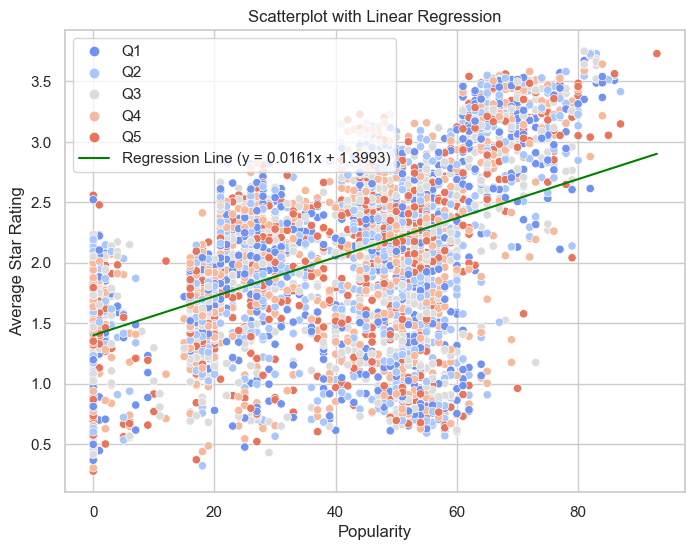

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = df_songs[['popularity']]
y = df_songs['avg_star_rating']
regressor = LinearRegression()
regressor.fit(X, y)

# Get the coefficients of the linear regression
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Create a scatterplot
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x='popularity',
                y='avg_star_rating',
                data=df_songs,
                hue='num_ratings_category',
                palette='coolwarm',
                legend='full',
                hue_order=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Plot the regression line
x_range = np.linspace(df_songs['popularity'].min(), df_songs['popularity'].max(), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='green', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f})')

# Add a title and labels
plt.title('Scatterplot with Linear Regression')
plt.xlabel('Popularity')
plt.ylabel('Average Star Rating')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [15]:
import statsmodels.api as sm
import scipy.stats as stats

X = sm.add_constant(X)
regressor = sm.OLS(y, X).fit()

# Perform a t-test for the slope parameter
t_statistic = regressor.tvalues['popularity']
p_value = regressor.pvalues['popularity']

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f'The p-value ({p_value:.4f}) is less than alpha ({alpha}), so the slope is statistically significant.')
else:
    print(f'The p-value ({p_value:.4f}) is greater than alpha ({alpha}), so the slope is not statistically significant.')

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')


The p-value (0.0000) is less than alpha (0.05), so the slope is statistically significant.
T-Statistic: 41.3305
P-Value: 0.0000


In [16]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:        avg_star_rating   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1708.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          9.64e-316
Time:                        21:03:34   Log-Likelihood:                -4020.7
No. Observations:                4398   AIC:                             8045.
Df Residuals:                    4396   BIC:                             8058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3993      0.016     85.182      0.0

### Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

In [17]:
top_10_rating = df_songs.sort_values(by = 'avg_star_rating', ascending=False).head(10)[['songNumber', 'artists', 'album_name', 'track_name', 'popularity', 'avg_star_rating', 'num_ratings']]

In [18]:
import joblib

In [19]:
joblib.dump(df_songs.sort_values(by = 'avg_star_rating', ascending=False).songNumber.values, "avg_star_rating_order.pkl")

['avg_star_rating_order.pkl']

In [20]:
top_10_rating

,songNumber,artists,album_name,track_name,popularity,avg_star_rating,num_ratings
3877,3877,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",81,3.750000,996
2105,2105,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82,3.737475,998
2003,2003,The Neighbourhood,I Love You.,Sweater Weather,93,3.729651,1032
2011,2011,WALK THE MOON,TALKING IS HARD,Shut Up and Dance,83,3.729124,982
3464,3464,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,82,3.727829,981
3253,3253,Gorillaz;Tame Impala;Bootie Brown,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),82,3.727451,1020
3201,3201,Evanescence,Fallen,Bring Me To Life,82,3.712598,1016
3007,3007,Linkin Park,Meteora,Numb,83,3.685801,993
2770,2770,The Offspring,Americana,The Kids Aren't Alright,81,3.672234,958
3256,3256,System Of A Down,Toxicity,Chop Suey!,83,3.661677,1002


In [21]:
top_10_popularity = df_songs.sort_values(by = 'popularity', ascending=False).head(10)[['songNumber', 'artists', 'album_name', 'track_name', 'popularity', 'avg_star_rating', 'num_ratings']]

In [22]:
top_10_popularity

,songNumber,artists,album_name,track_name,popularity,avg_star_rating,num_ratings
2003,2003,The Neighbourhood,I Love You.,Sweater Weather,93,3.729651,1032
3300,3300,Oliver Tree;Robin Schulz,Miss You,Miss You,87,3.415400,987
2000,2000,The Neighbourhood,Wiped Out!,Daddy Issues,87,3.148004,1027
3004,3004,GAYLE,abcdefu,abcdefu,86,3.563261,1067
2002,2002,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,3.509865,963
2106,2106,The Killers,Hot Fuss,Mr. Brightside,86,3.549039,989
2053,2053,Radiohead,Pablo Honey,Creep,85,3.053794,1041
3006,3006,Linkin Park,Hybrid Theory (Bonus Edition),In the End,85,3.513678,987
3255,3255,Gorillaz,Demon Days,Feel Good Inc.,84,3.488033,961
3217,3217,The White Stripes,Elephant,Seven Nation Army,84,3.367115,967


In [23]:
print(f"This changes the Top 10 by {len(set(top_10_rating.songNumber) - set(top_10_popularity.songNumber))} songs.")

This changes the Top 10 by 9 songs.
